# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

### Reading the data

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns

In [180]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


### Cleaning the data

In [181]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [182]:
star_wars.head(1)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [183]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes': True, 'No': False})

In [184]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [185]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes': True, 'No': False})

In [186]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

- Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

In [187]:
cols = star_wars.columns[3:9]

In [188]:
cols

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie.

We'll convert each of these columns to a Boolean, then rename the column something more intuitive. 

In [189]:
for i in cols:
    star_wars[i] = star_wars[i].map({star_wars[i].value_counts().index[0] : True, np.NaN:False})

In [190]:
star_wars[cols].head(5)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [191]:
j=1
for i in list(star_wars.columns[3:9]):
    star_wars = star_wars.rename({i : 'seen_'+str(j)}, axis =1)
    j+=1

In [192]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

In [193]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [194]:
j=1
for i in list(star_wars.columns[9:15]):
    star_wars = star_wars.rename({i:'ranking_'+str(j)},axis=1)
    j+=1

### Analyzing the rankings of the movies

In [195]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<Container object of 6 artists>

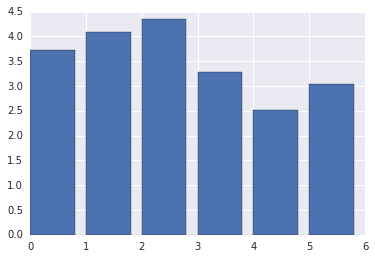

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. The ranking_4, ranking_5, ranking_6 are the ratings for the older movies. As suspected, it looks like the "original" movies are rated much more highly than the newer ones.

### Analyzing viewership of each movie

In [197]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<Container object of 6 artists>

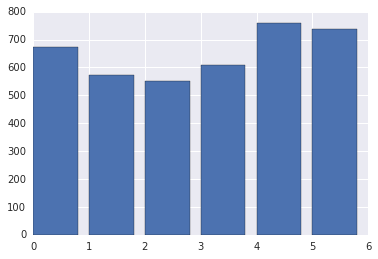

In [198]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

### Analysis based on Gender

In [199]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

#### Ranking of the movies on Gender

In [200]:
males[males.columns[9:15]].mean()

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

In [201]:
females[females.columns[9:15]].mean()

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

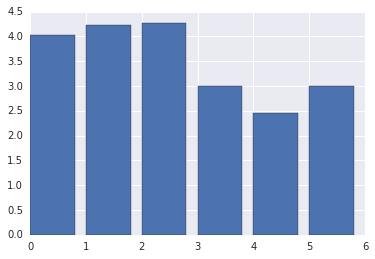

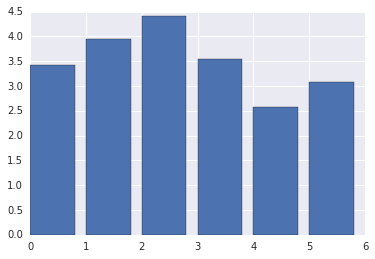

In [202]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

#### Analyzing viewership based on Gender

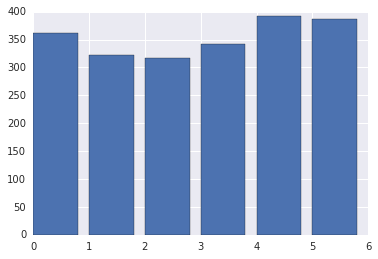

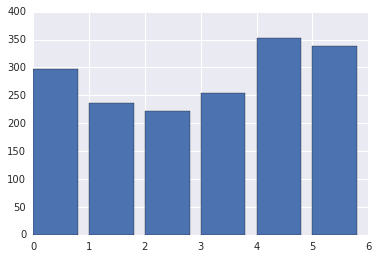

In [203]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

Interestingly, more men watched episodes 1-3, but men liked them far less than women did.

In [204]:
def plot_segments(star_wars,col,start_col,end_col):
    values = list(star_wars[col].unique())
    values.remove(np.nan)
    fig=plt.figure(figsize=(9,14))
    j=1
    for i in values:
        temp = star_wars[star_wars[col]==i]
        ax = 'ax' + str(j) 
        ax = fig.add_subplot(len(values),1,j)
        ax.set_title(i)
        ax.bar(range(6), temp[temp.columns[start_col:end_col]].sum())
        j+=1

### Analyzing based on Education

#### Ranking of the movies on Education

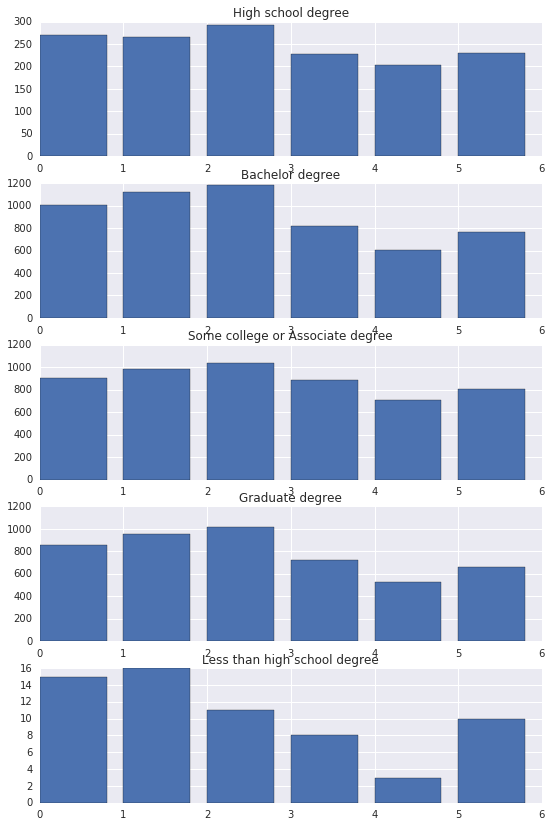

In [205]:
plot_segments(star_wars,'Education',9,15)

#### Analyzing viewership based on Education

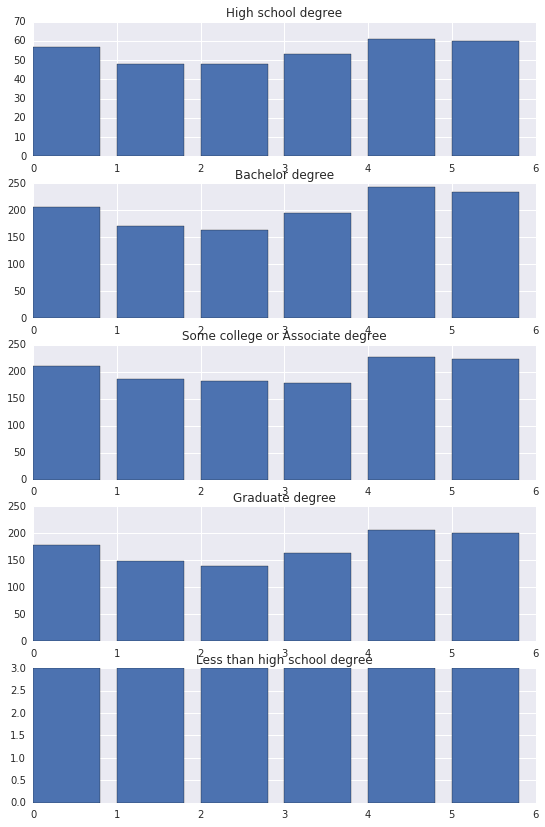

In [206]:
plot_segments(star_wars,'Education',3,9)

We can see that through all the different levels of Education the 4th older movies are more popular and highly rated.

### Analysis based on Location

#### Ranking of the movies on Location

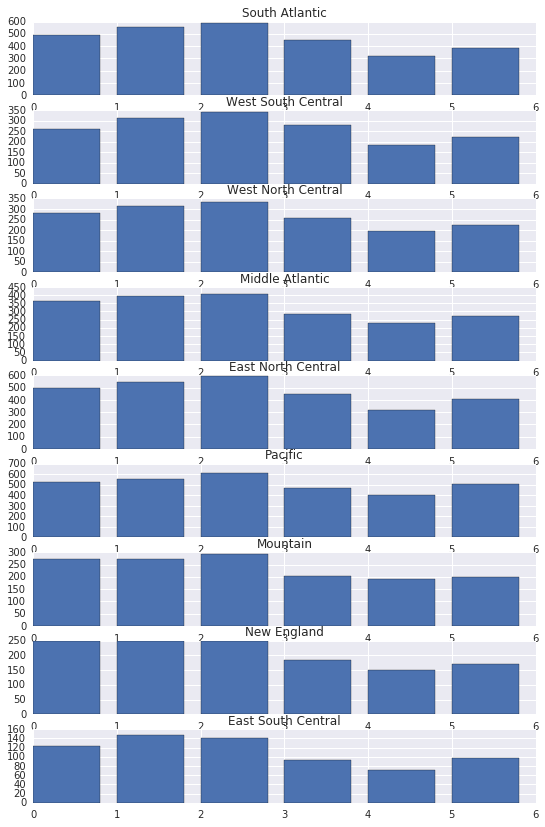

In [207]:
plot_segments(star_wars,'Location (Census Region)',9,15)

#### Analyzing viewership based on Education

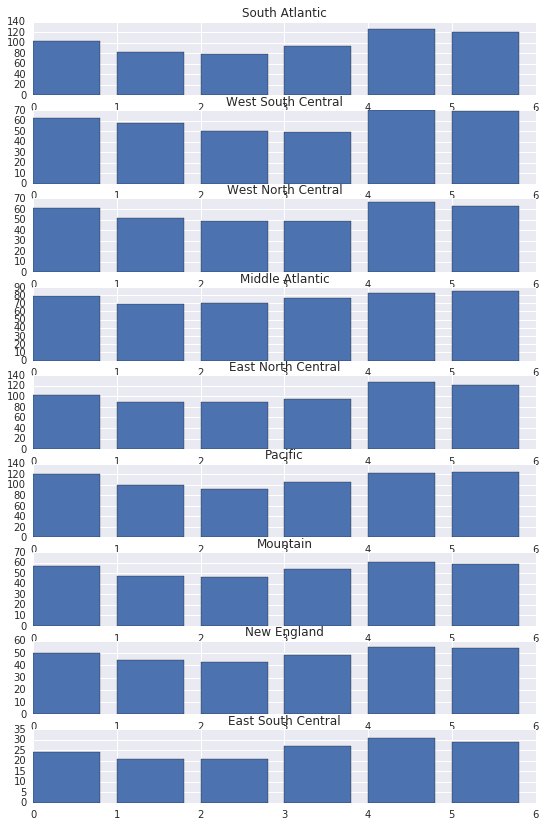

In [208]:
plot_segments(star_wars,'Location (Census Region)',3,9)

From the above we can see that the old movies were more viewed in all the regions than the new movies. Although episode was very popular it was not as appreciated as the older movies.

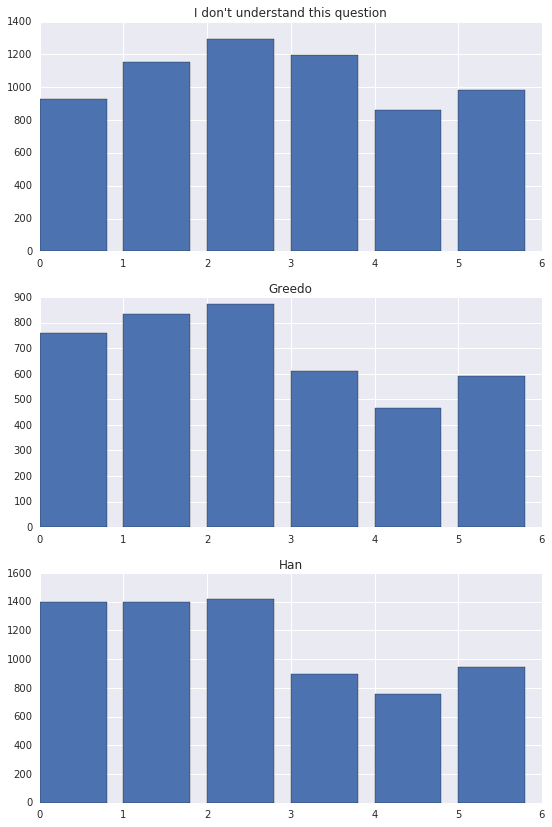

In [209]:
plot_segments(star_wars,'Which character shot first?',9,15)

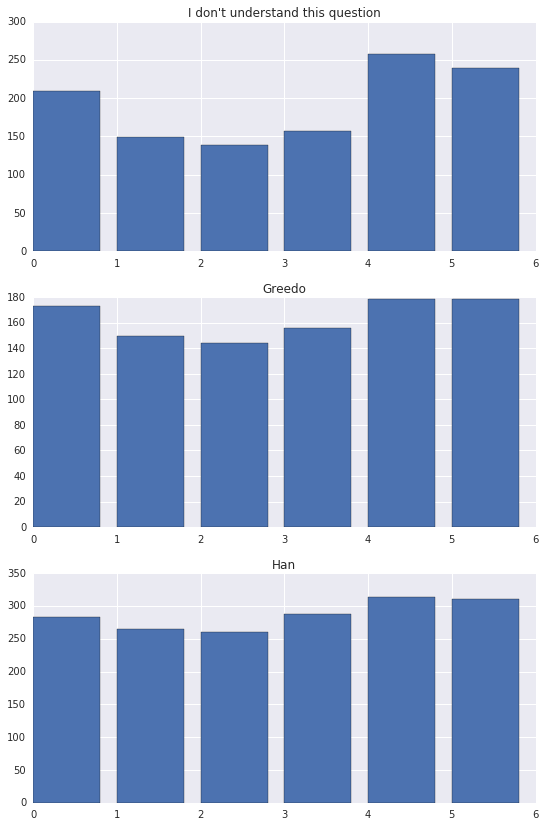

In [210]:
plot_segments(star_wars,'Which character shot first?',3,9)

Whoever didn't understand the 'Who shot first question?' liked the new movie more than the one who chose Greedo or Han shot first.

The same set of people also watched the newer movies more than the old movies.
From this we can make an assumption that these people liked the new movies and didn't understand the question may not have seen the old movies.

### Analyzing most Popular character in Star Wars

In [211]:
star_wars = star_wars.rename(columns = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han_Solo',
                                        'Unnamed: 16':'Luke_Skywalker',
                                         'Unnamed: 17': 'Princess_Leia',
                                         'Unnamed: 18':'Anakin_Skywalker',
                                         'Unnamed: 19':'Obi_Wan_Kenobi',
                                         'Unnamed: 20':'Emperor_Palpatine',
                                          'Unnamed: 21':'Darth_Vader',
                                          'Unnamed: 22':'Lando',
                                          'Unnamed: 23':'Boba',
                                          'Unnamed: 24':'C3P0',
                                         'Unnamed: 25':'R2D2',
                                          'Unnamed: 26':'Jar_Jar',
                                          'Unnamed: 27':'Padme',
                                          'Unnamed: 28':'Yoda'})

In [259]:
characters = star_wars.iloc[:,15:29]

In [260]:
temp= pd.DataFrame()
for i in characters.columns:
    temp = temp.append(characters[i].value_counts())

In [261]:
temp = temp.reset_index()
temp = temp.rename(columns={'index':'Names'})

In [262]:
for i in temp.iloc[:,1:].columns:
    temp.sort_values(by=i,ascending=False)
    print("Top 5 "+i)
    print(temp['Names'].head(5))
    print("\n")

Top 5 Neither favorably nor unfavorably (neutral)
0            Han_Solo
1      Luke_Skywalker
2       Princess_Leia
3    Anakin_Skywalker
4      Obi_Wan_Kenobi
Name: Names, dtype: object


Top 5 Somewhat favorably
0            Han_Solo
1      Luke_Skywalker
2       Princess_Leia
3    Anakin_Skywalker
4      Obi_Wan_Kenobi
Name: Names, dtype: object


Top 5 Somewhat unfavorably
0            Han_Solo
1      Luke_Skywalker
2       Princess_Leia
3    Anakin_Skywalker
4      Obi_Wan_Kenobi
Name: Names, dtype: object


Top 5 Unfamiliar (N/A)
0            Han_Solo
1      Luke_Skywalker
2       Princess_Leia
3    Anakin_Skywalker
4      Obi_Wan_Kenobi
Name: Names, dtype: object


Top 5 Very favorably
0            Han_Solo
1      Luke_Skywalker
2       Princess_Leia
3    Anakin_Skywalker
4      Obi_Wan_Kenobi
Name: Names, dtype: object


Top 5 Very unfavorably
0            Han_Solo
1      Luke_Skywalker
2       Princess_Leia
3    Anakin_Skywalker
4      Obi_Wan_Kenobi
Name: Names, dtype: object

In [263]:
temp['Controversial Score'] = (temp['Very favorably'] +temp['Somewhat favorably']) - (temp['Very unfavorably'] + temp['Somewhat unfavorably'])

In [268]:
print('Most Controversial Characters : ')
temp.sort_values(by='Controversial Score').head(3)['Names']

Most Controversial Characters : 


11              Jar_Jar
5     Emperor_Palpatine
8                  Boba
Name: Names, dtype: object